In [7]:
# USE PCA WHEN THERE IS LARGE DATA LIKE 1000 ROWS AND 1000 COLUMS 
# import iris dataset
from sklearn import datasets
iris = datasets.load_iris()
# Define features and targets
X = iris.data
y = iris.target

In [8]:
# train test split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 21)

In [9]:
# scale the data. calculate Z-score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# import PCA 
from sklearn.decomposition import PCA
pca = PCA()

In [11]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
print("The variance values of the PC components are : ")
print("------------------------------------------------")
print(pca.explained_variance_ratio_)



The variance values of the PC components are : 
------------------------------------------------
[0.74530178 0.21476881 0.03491672 0.00501269]


In [13]:
# to select just 2 principal components for building the ML model
pca2 = PCA(n_components =2)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)



In [14]:
pca2.explained_variance_ratio_

array([0.74530178, 0.21476881])

In [15]:
pca2.components_

array([[ 0.51583436, -0.30437043,  0.57429699,  0.55808289],
       [ 0.3949399 ,  0.912775  ,  0.03291943,  0.09889681]])

In [16]:
print(X_train_pca2.shape)
print(X_test_pca2.shape)

(112, 2)
(38, 2)


Text(0, 0.5, 'Second Principal component')

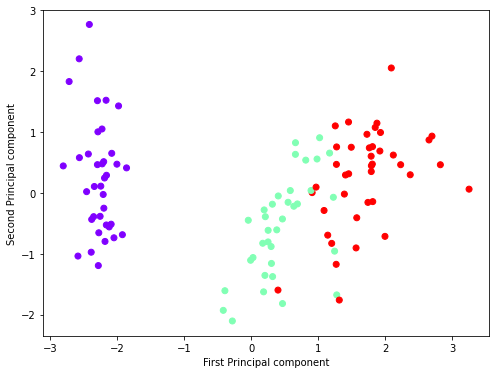

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca2[:,0],X_train_pca2[:,1], c = y_train , cmap ='rainbow')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
# Create the model using traiing data
knn.fit(X_train_pca2, y_train)

KNeighborsClassifier()

In [19]:
# Use the model to predict the values for test data
y_pred_pca2 = knn.predict(X_test_pca2)
# calculate the accuracy , y_test - actual values , y_pred_pca2 - predicted values.
print("Accuracy of model prediction using 2 principal components is:" 
      , accuracy_score(y_test,y_pred_pca2))

Accuracy of model prediction using 2 principal components is: 0.8421052631578947


In [20]:
# correlation of principal components
import pandas as pd
# create a datframe using X_train_pca
df_pca2=pd.DataFrame(X_train_pca2)
# Correaltion between pca components
df_pca2.corr()
# very low value od 3.64*10^(-16)

,0,1
0,1.000000e+00,2.966990e-16
1,2.966990e-16,1.000000e+00


<AxesSubplot:>

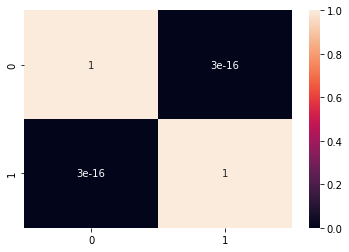

In [21]:
import seaborn as sns
sns.heatmap(df_pca2.corr(),annot=True)